## PCA를 이용한 얼굴 이미지에서 특성 추출
<pre>
(1) LFW(Labeled Faces in the Wild) 데이터 셋 : 유명 인사들의 얼굴 이미지(2000년 초반 정치인, 가수, 배우, 운동선수의얼굴 포함)
(2) http://vis-www.cs.umass.edu/lfw/
(3) fetch_lfw_people 함수는 기본값으로 흑백 이미지를 사용함. 컬러 이미지의 경우 color=True 옵션을 준다.
(4) 이번 실습 데이터는 LFW 데이터셋에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있다. 각 이미지의 크기는 87X65픽셀이다.
</pre>

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [30]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
# data, images, target
print(people)
print(people['images'].shape) # image 데이터 확인
print(image_shape)   # 이미지 픽셀

{'data': array([[  57.        ,   60.33333206,   78.        , ...,   17.33333397,
          16.66666603,   22.66666603],
       [  66.66666412,   80.66666412,   88.66666412, ...,    8.66666698,
           8.33333302,    9.33333302],
       [  18.66666603,   14.33333302,   15.        , ...,   22.66666603,
          22.66666603,   25.66666603],
       ..., 
       [  77.33333588,   90.33333588,   93.33333588, ...,  233.66667175,
         234.33332825,  230.66667175],
       [  87.66666412,   71.66666412,   63.33333206, ...,   96.        ,
          92.33333588,   96.33333588],
       [  91.        ,   90.66666412,   94.66666412, ...,   40.33333206,
          42.33333206,   42.33333206]], dtype=float32), 'images': array([[[  57.        ,   60.33333206,   78.        , ...,   40.66666794,
           36.66666794,   34.        ],
        [  52.66666794,   60.        ,   92.        , ...,   46.66666794,
           36.        ,   30.        ],
        [  46.        ,   66.        ,  113.3333358

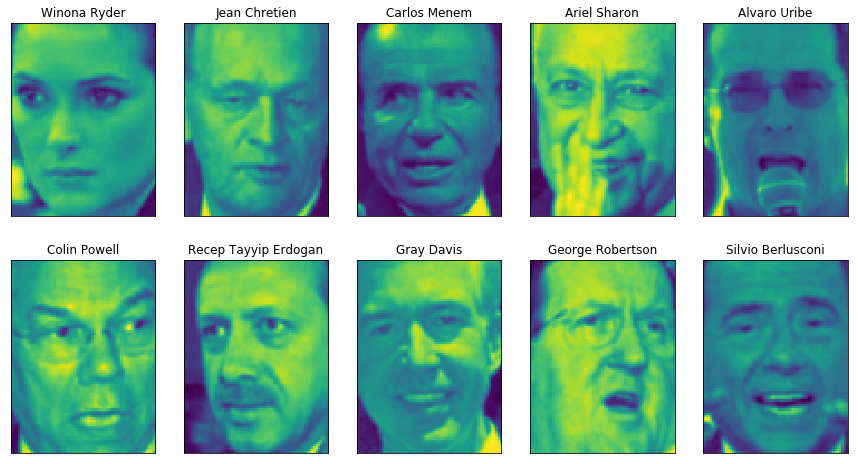

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), 
                        subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [15]:
print("people.images.shape: {}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

print(people.DESCR)
print(people.data)
print(people.target.shape)

people.images.shape: (3023, 87, 65)
클래스 개수: 62
LFW faces dataset
[[  57.           60.33333206   78.         ...,   17.33333397
    16.66666603   22.66666603]
 [  66.66666412   80.66666412   88.66666412 ...,    8.66666698
     8.33333302    9.33333302]
 [  18.66666603   14.33333302   15.         ...,   22.66666603
    22.66666603   25.66666603]
 ..., 
 [  77.33333588   90.33333588   93.33333588 ...,  233.66667175
   234.33332825  230.66667175]
 [  87.66666412   71.66666412   63.33333206 ...,   96.           92.33333588
    96.33333588]
 [  91.           90.66666412   94.66666412 ...,   40.33333206
    42.33333206   42.33333206]]
(3023,)


### 데이터의 편중을 없애기 위해 50개의 이미지만 선택
### 왜냐? 조지 부시 이미지의 치우친 특성이 추출됨.

In [7]:
mask = np.zeros(people.target.shape, dtype=np.bool)  
print(np.bool)
print(target)                   # 사람들 target값.
print(people.target.shape)      # 전체 데이터 크기 
print(mask)                     # 전체 데이터 크기만큼 booleanㄹ 채운다.
print(np.unique(people.target)) # people.target 중에 유닉한 값의 인덱스 반환
print(np.where(people.target==target)[0][:50])

<class 'bool'>
54
(3023,)
[False False False ..., False False False]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61]
[   9  138  225  402  421  526  601  656  667  833  893  957 1007 1022 1302
 1304 1376 1437 1515 1764 1772 1779 1861 1866 1869 1995 1997 2104 2196 2843
 2844 2892 2894]


In [11]:
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1  # 해당 위치의 값 중에 50개만 선택(유일함)


X_people = people.data[mask]
y_people = people.target[mask]
print(X_people, y_people)

LFW faces dataset
[[  57.           60.33333206   78.         ...,   17.33333397
    16.66666603   22.66666603]
 [  66.66666412   80.66666412   88.66666412 ...,    8.66666698
     8.33333302    9.33333302]
 [  18.66666603   14.33333302   15.         ...,   22.66666603
    22.66666603   25.66666603]
 ..., 
 [  36.33333206   22.33333397   28.         ...,   14.33333302
     6.66666651    5.33333349]
 [  54.           65.33333588   56.33333206 ...,  209.66667175  210.
   212.33332825]
 [ 110.66666412  128.33332825  145.33332825 ...,   14.           14.
    13.66666698]] [61 25  9 ...,  9 37 22]


In [16]:
# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 같다.
X_people = X_people / 255
X_people

array([[ 0.22352941,  0.23660131,  0.30588236, ...,  0.06797386,
         0.06535947,  0.08888888],
       [ 0.26143789,  0.31633985,  0.3477124 , ...,  0.03398693,
         0.03267974,  0.03660131],
       [ 0.07320261,  0.05620915,  0.05882353, ...,  0.08888888,
         0.08888888,  0.10065359],
       ..., 
       [ 0.14248365,  0.0875817 ,  0.10980392, ...,  0.05620915,
         0.02614379,  0.02091503],
       [ 0.21176471,  0.25620916,  0.22091503, ...,  0.82222223,
         0.82352942,  0.83267969],
       [ 0.43398693,  0.50326794,  0.56993461, ...,  0.05490196,
         0.05490196,  0.05359477]], dtype=float32)

## 얼굴 인식(knn 알고리즘 이용)
<pre>
(1) 정확도가 23%이다.
(2) 나쁜 결과도 좋은 결과도 아니다. 네 번에 한 번 꼴로만 올바르게 인식한다.
(3) PCA를 이용하여 화이트닝(whitening) 옵션을 이용해서 주성분이 스케일이 같아지도록 조정해 본다.
  -> 이는 화이트닝 옵션 없이 변환한 후에 StandardScaler를 적용하는 것과 같다.
</pre>

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


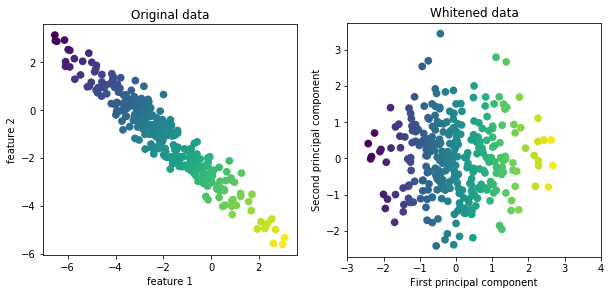

In [24]:
import mglearn
# PCA 변환은 데이터의 평균을 0으로 만들어준다.
# 화이트닝 옵션을 적용하는 것은 PCA 변환한 뒤에 StandardScaler를 적용하는 것과 같다.
mglearn.plots.plot_pca_whitening()

In [26]:
from sklearn.decomposition import PCA

### PCA로 변환 후, 훈련 시키고 이에 대한 정확도를 예측한다.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape : {}".format(X_train_pca.shape))

X_train_pca.shape : (1547, 100)


### 새로운 데이터를 모델에 적용
<pre>
주성분이 데이터를 더 잘표현한다고 볼 수 있다.

주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이라는 것을 기억하자.
입력 차원은 87 X 65 픽셀의 흑백 이미지이고, 
따라서 이 공간의 어떤 방향도 87 X 65 픽셀의 흑백 이미지이다.
</pre>

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [28]:
print("pca.components_.shape : {}".format(pca.components_.shape))

pca.components_.shape : (100, 5655)


### 주성분의 15개를 확인해 보자.

<img src="img/pca01.jpg">

In [35]:
print("pca_components_ : {}".format(pca.components_))
print("pca_components_.shape : {}".format(pca.components_.shape))

pca_components_ : [[ -2.80047337e-03  -3.34964738e-03  -4.00077748e-03 ...,  -5.65136827e-03
   -5.14661738e-03  -4.39911630e-03]
 [  1.40067672e-02   1.36567001e-02   1.39008965e-02 ...,  -1.96435413e-02
   -1.84993339e-02  -1.72561077e-02]
 [ -2.86945575e-02  -2.98412847e-02  -3.12133448e-02 ...,   5.69679012e-04
    1.09051775e-03   1.49338314e-03]
 ..., 
 [ -1.92246041e-02  -1.53169089e-02  -6.10183212e-03 ...,   1.55152784e-05
   -1.95588584e-02  -3.51698522e-02]
 [  1.45767248e-02   1.25282582e-02   8.57117989e-03 ...,  -2.87605360e-02
   -4.42293557e-02  -4.52499417e-02]
 [ -1.01053559e-03  -3.05630680e-04  -4.01254635e-03 ...,  -1.12702209e-02
   -8.72981846e-03  -8.09034995e-03]]
pca_components_.shape : (100, 5655)


<pre>
(1) 주 성분을 다 이해할 수 없다. 하지만 몇몇 주성분이 잡아낸 얼굴 이미지의 특징을
짐작해 볼 수 있다.
(2) 첫번째 주성분 : 얼굴과 배경의 명암 차이를 기록했다.
(3) 두번째 주성분 : 오른쪽과 왼쪽 조명의 차이를 담고 있다.
(4) PCA변환은 데이터를 회전시키고 분산이 작은 주성분을 덜어내는 것이다.
(5) 테스트 포인트를 주성분의 가중치의 합으로 나타내는 데 필요한 수치를 찾는 것을 해석가능.
</pre>

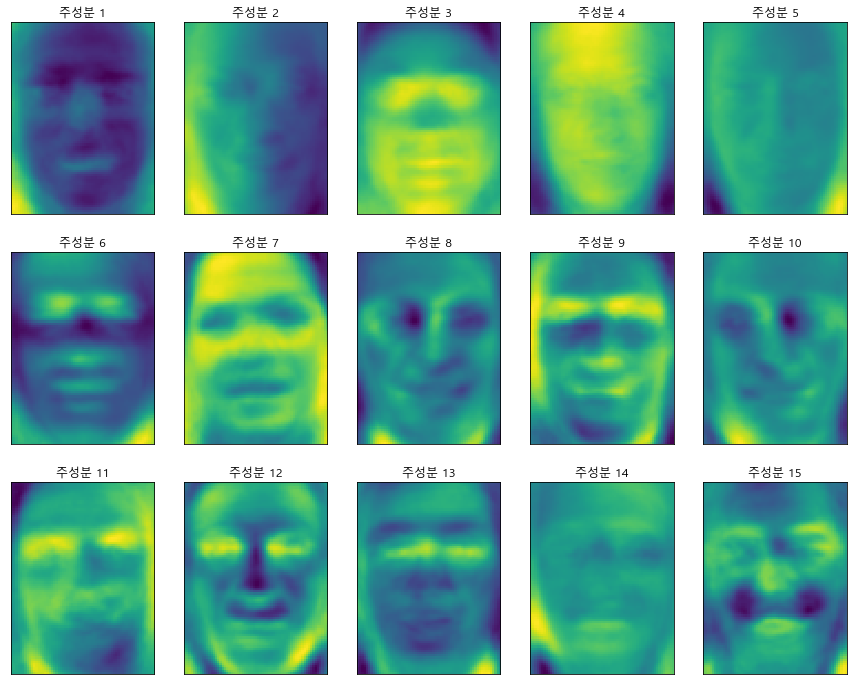

In [31]:
fig, axes =  plt.subplots(3,5, figsize=(15,12),
                         subplot_kw={'xticks' : (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i+1)))

<img src="img/pca02.png">
파이썬을 활용한 머신러닝 그림 참조

### pca 모델을 이해하기
<pre>
몇 개의 주성분을 사용해 원본 데이터를 재구성해보기.
아래 그림은 10, 50, 100, 500개의 주성분을 사용해 얼굴 이미지를 재구성한 것이다.
주성분을 10개만 사용했을 땐 얼굴의 각도, 조명 같은 이미지의 기본 요소만 나타난다. 주성분을
더 많이 사용할수록 이미지가 더욱 상세해 진다.
-> 주성분을 추가하는 것은 '덧셈 항'을 더 추가하는 것과 같다.
</pre>

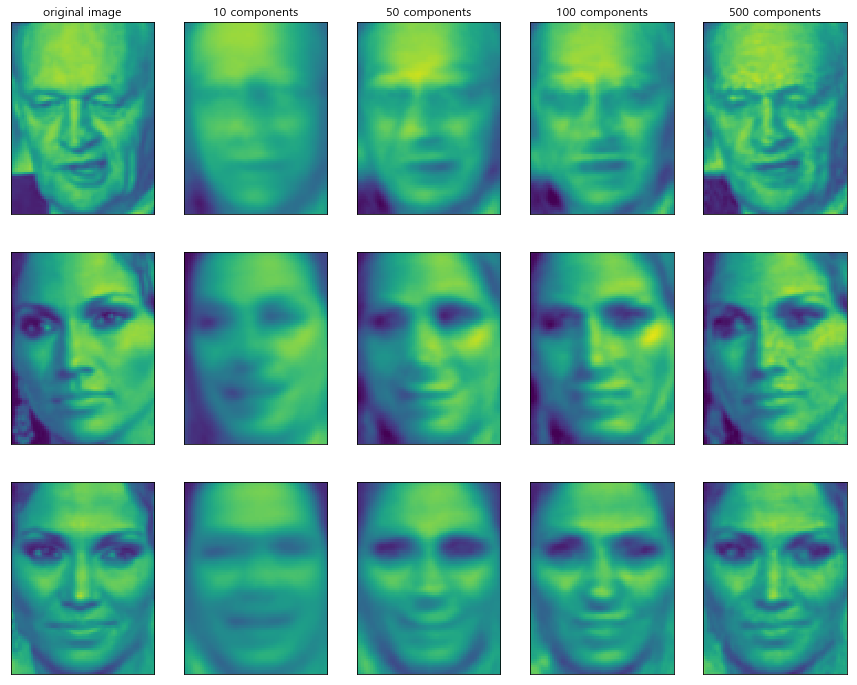

In [38]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)